## Step 1.1, Loading our data

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("CC GENERAL.csv")

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


So some basic descriptions for going forward:<br><br>

1 - CUST_ID : Identification of Credit Card holder (Categorical)<br><br>
2 - BALANCE : Balance amount left in their account to make purchases<br><br>
3 - BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br><br>
4 - PURCHASES : Amount of purchases made from account<br><br>
5 - ONEOFF_PURCHASES : Maximum purchase amount done in one-go<br><br>
6 - INSTALLMENTS_PURCHASES : Amount of purchase done in installment, paying back sum in increments<br><br>
7 - CASH_ADVANCE : Cash in advance given by the user, the borrowed cash from a credit card<br><br>
8 - PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br><br>
9 - ONEOFFPURCHASESFREQUENCY : How frequently Large Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br><br>
10 - PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br><br>
11 - CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br><br>
12 - CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br><br>
13 - PURCHASES_TRX : Numbe of purchase transactions made<br><br>
14 - CREDIT_LIMIT : Limit of Credit Card for user<br><br>
15 - PAYMENTS : Amount of Payment done by user<br><br>
16 - MINIMUM_PAYMENTS : Minimum amount of payments made by user<br><br>
17 - PRCFULLPAYMENT : Percent of full payment paid by user<br><br>
18 - TENURE : Tenure of credit card service for user, this is the amount of time that is allowed before interest is applied. Can be hours, days, or weeks<br><br>
This data is the activity of customers over a six month period. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In our little readout we see there are over 300 missing values in the Minimum payments section.
Though this isn't the largest number of missing data points in comparison to our whole dataset, this is however a significant anomaly. We have a few options. We can use the average to fill out our missing values as an assumption, though this is data within finance and could be an indication of something, like non payment of loans or only full payments. We can also drop this data, it isn't a particularly large section of data. Let's take a closer look at a few of the entries that contain null values before we make a decision!<br>
We are also missing a single Credit Limit value.... Huh. That is likely best dropped as it is a single value and using an average isn't likely to be accurate for this point.<br>
We also have to drop our Cust_ID column as it isn't a numerical datapoint and is a label of each customer, which isn't soemthing we can use to find direct patterns within this dataset

In [5]:
# quickly dropping our customer id column as it isn't useful within this dataset for our purposes
data = data.drop(columns='CUST_ID')

In [6]:

print(data.loc[data.isnull().any(axis=1)])

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
56    3625.218146           1.000000     313.27            313.27   
63       7.152356           0.090909     840.00            840.00   
93    1307.717841           1.000000     405.60            405.60   
94    2329.485768           1.000000     213.34            213.34   
97    3505.671311           1.000000       0.00              0.00   
99       0.000000           0.000000       0.00              0.00   
103      0.624240           0.090909     389.96              0.00   
111   3393.351236           1.000000       0.00              0.00   
121   1464.324632           1.0000

Our null values are referencing possibly that there are no minimum payments required in their current payment period, or that the payments made are in advance to their minimum. They have made payments but it seems that some haven't been keeping up with required payments or the minimum payments are not yet recorded due to more recent purchases.<br>
The best plan of action would be to assign the payment value to the minimum value for the time being. Without proper understanding of this domain, I cannot entirely understand what is going on with this data. We see payments but perhaps with these purchases were too recent to be put into the dataset proper. And assuming they are making or required to make payments at this time can potentially cause more inaccuracies. I feel it safer to assume the payments made by those were required at this time.

In [7]:
for idx, row in data.iterrows():
    if pd.isnull(row['MINIMUM_PAYMENTS']):
        data.at[idx, 'MINIMUM_PAYMENTS'] = row['PAYMENTS']

In [8]:
# Confirming changes were successful
print(data.loc[[54,55,56,63]])
data.info()

        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
54     6.660517           0.636364     310.00              0.00   
55  1311.995984           1.000000    1283.90           1283.90   
56  3625.218146           1.000000     313.27            313.27   
63     7.152356           0.090909     840.00            840.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
54                   310.0      0.000000             0.666667   
55                     0.0      0.000000             0.250000   
56                     0.0    668.468743             0.250000   
63                     0.0      0.000000             0.083333   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
54                    0.000000                          0.666667   
55                    0.250000                          0.000000   
56                    0.250000                          0.000000   
63                    0.083333                          0.000000  

In [9]:
# a for loop that goes through the list generated by the pandas dataframe's duplicate check function
for i in data.duplicated():
    if i == True:
        print("There are duplicates")
        break

With no output we can safely say there weren't any duplicates. Now lets drop that one last null value
and continue on!

In [10]:
# removing the last null value and then placing the clean dataframe into a new variable
cleandf = data.dropna()

In [11]:
# confirming all entries are correct
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8949 non-null float64
BALANCE_FREQUENCY                   8949 non-null float64
PURCHASES                           8949 non-null float64
ONEOFF_PURCHASES                    8949 non-null float64
INSTALLMENTS_PURCHASES              8949 non-null float64
CASH_ADVANCE                        8949 non-null float64
PURCHASES_FREQUENCY                 8949 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8949 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8949 non-null float64
CASH_ADVANCE_FREQUENCY              8949 non-null float64
CASH_ADVANCE_TRX                    8949 non-null int64
PURCHASES_TRX                       8949 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8949 non-null float64
MINIMUM_PAYMENTS                    8949 non-null float64
PRC_FULL_PAYMENT           

## Step 1.2, Gathering some extra insights out our dataset

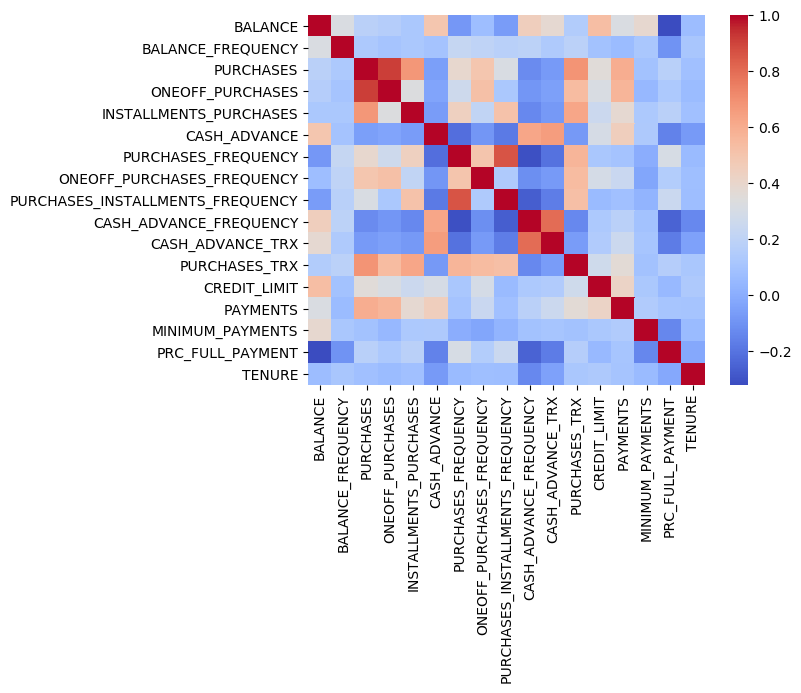

<Figure size 10000x10000 with 0 Axes>

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt

# generating a heatmap using a correlation matrix generated via Pandas
sb.heatmap(cleandf.corr(), cmap="coolwarm")
plt.figure(figsize=(100,100))
plt.show()

We have seen this dataset before so our insights of the heatmap are similar to before. <br>
We know there are some more obvious relations, like those between balance and full payments percentage, purchases and oneoff-purchases, and the frequencies and transaction numbers (TRX). Otherwise we may have some extra noise in this dataset that may cause issues. 

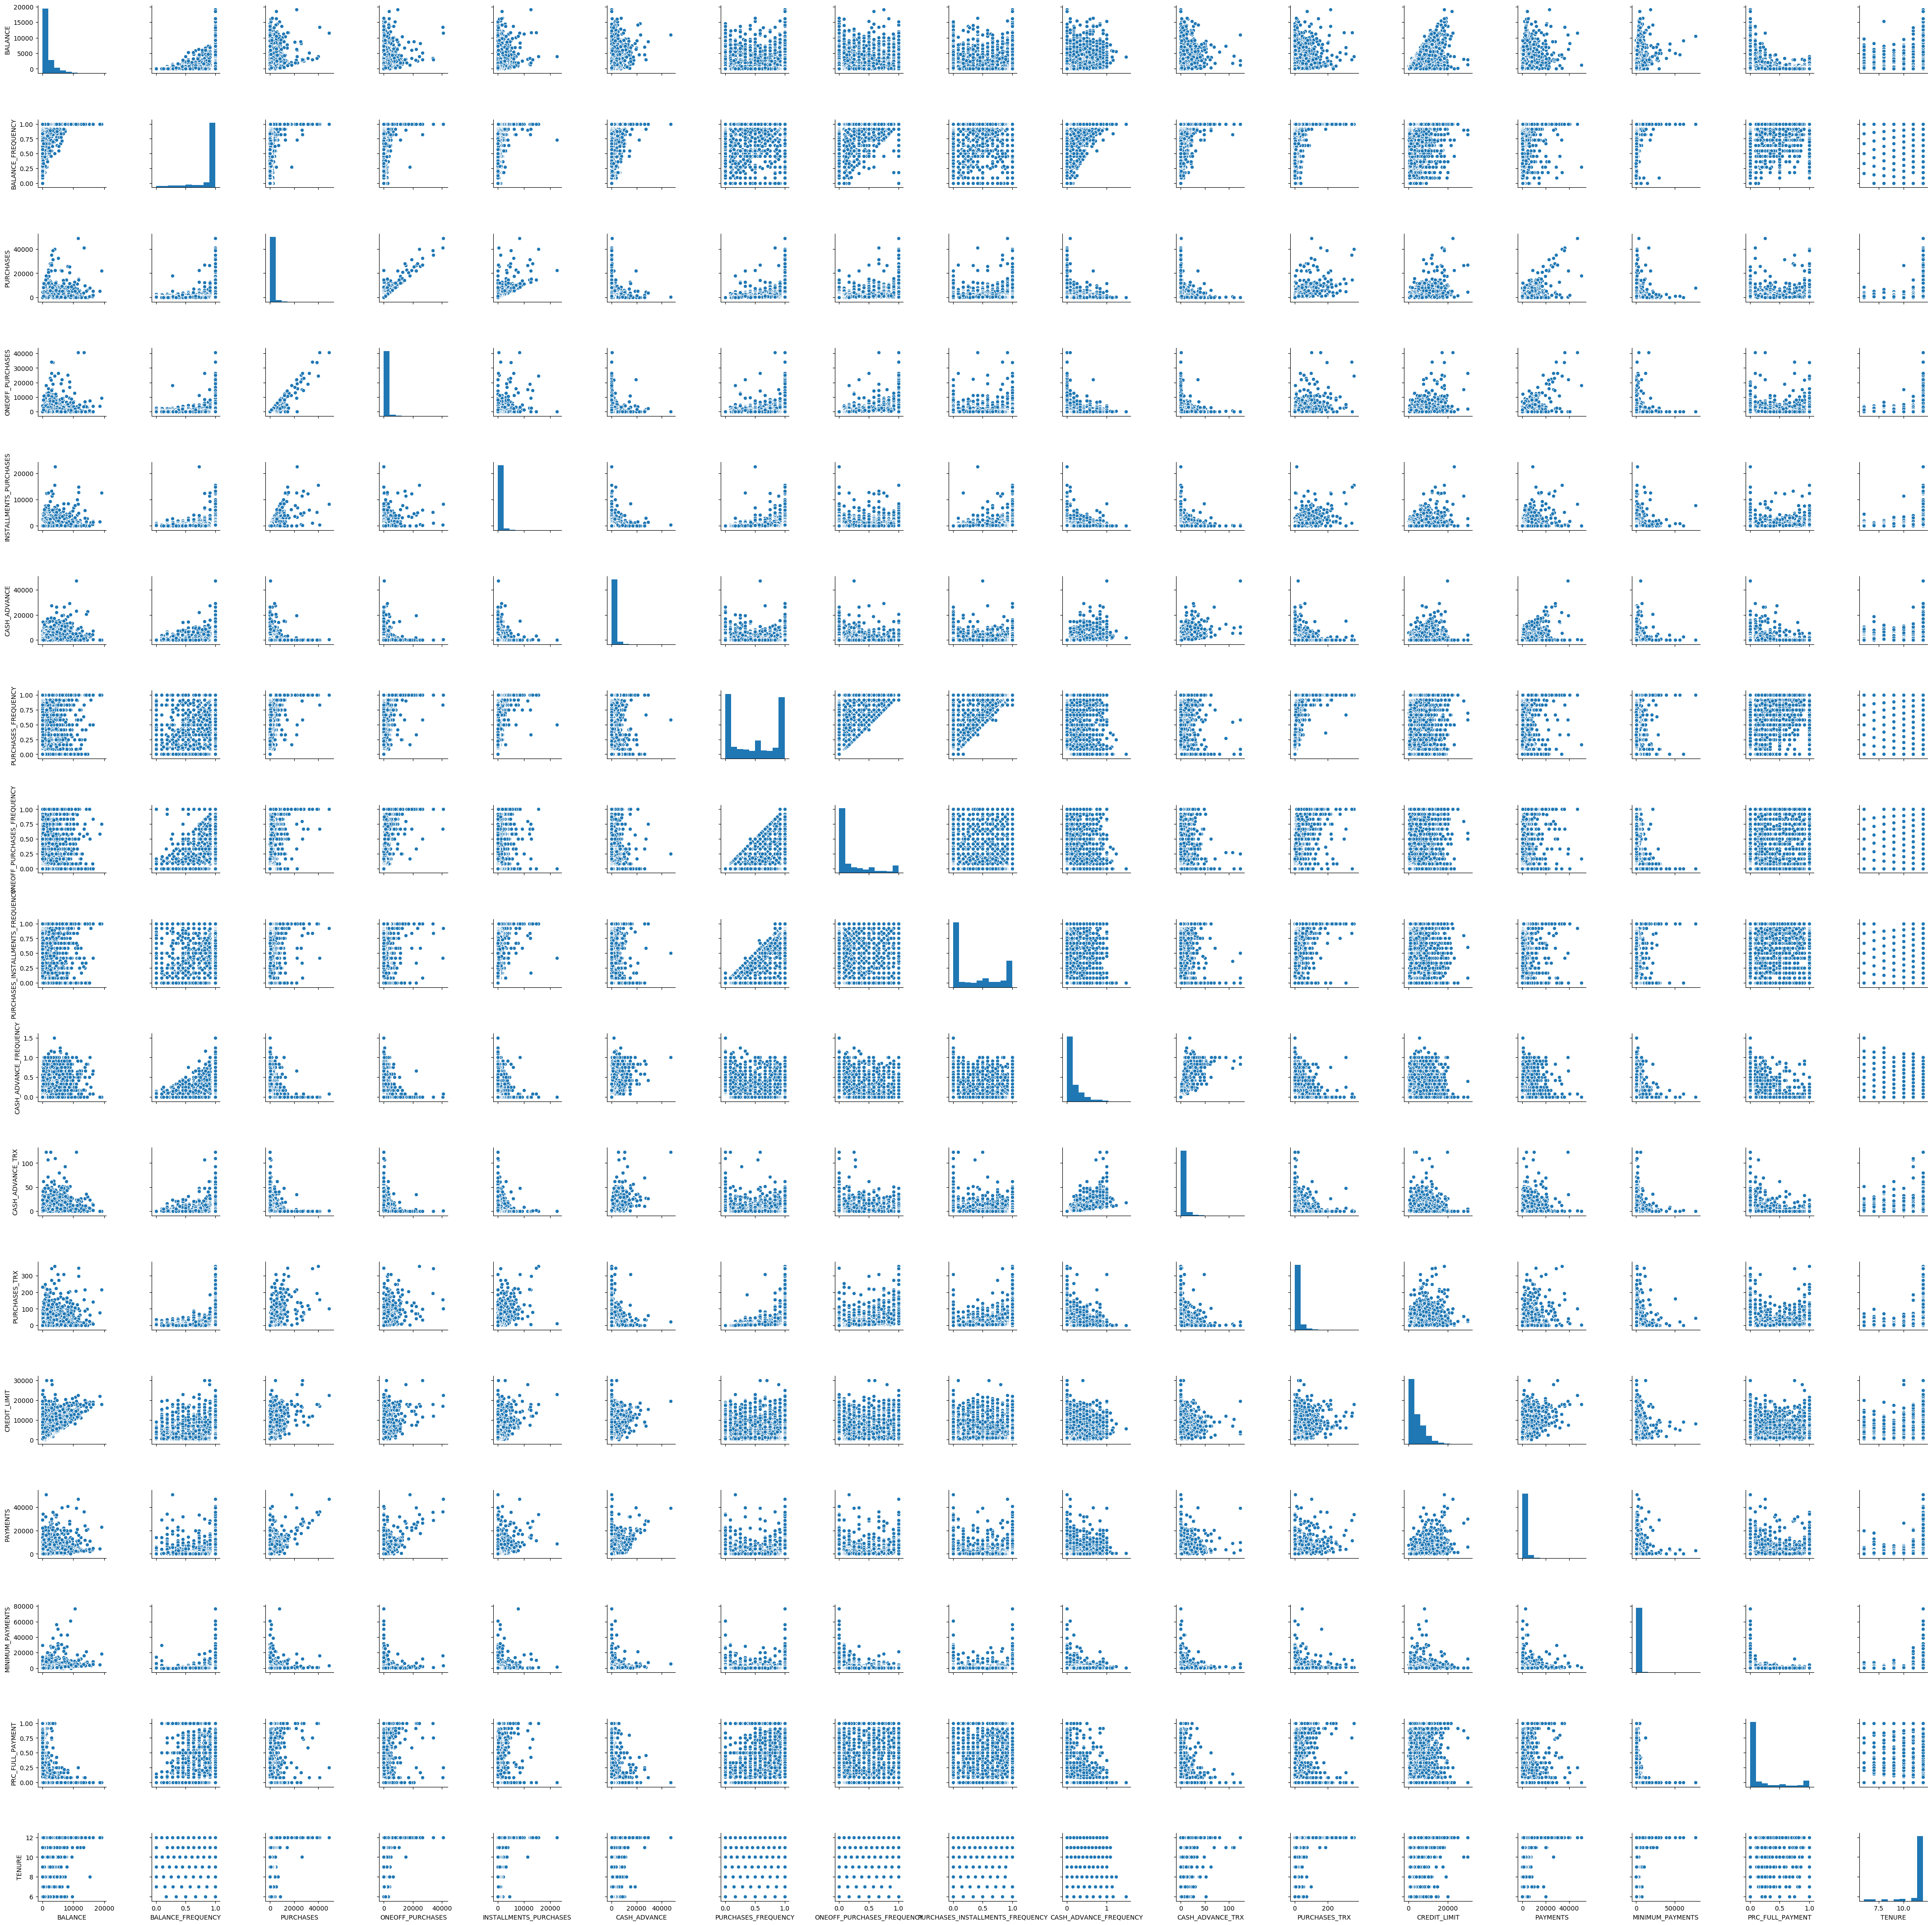

In [13]:
sb.pairplot(cleandf)# commented out to save time, using a pre generated plot that is then imported via an image
plt.show()

We see in our bar charts there isn't a very healthy spread in our data. This can suggest our data has
 a bias or is simply lopsided towards a specific trend of customer, as the worst customers don't stick around long enough perhaps. Or this data comes from a big deal the company/bank had to attract new customers, as we see a lot of customers with a 12 in tenure. <br>
 Otherwise we see relations that support the heatmaps initial analysis. A lot of our other data is too dense and there isn't a desernable relation between the two features.

## Step 2.1, Processing and Scaling our data

In [14]:
# here we scale our data using the MinMaxScaler to set everything to a range of 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
# Quickly scaling our cleaned dataframe, PCA assumes the data it is fed is scaled in some way
scaled = scaler.fit_transform(cleandf)

### Using PCA

What is PCA?<br>
Well Principal Component Analysis (PCA) is a process of minimizing data to extract the most meaningful data from a dataset, reducing noise and enhancing feature differentiation, to simply sum things up. We calculate a covariance matrix for the dataset, looking at how the features relate or do not relate to one another in a way. <br>
We then calculate the maximum variances and apply them to the axis and magnitude of the matrix for all features <br>
We then sort our values (magnitudes) in decending order, the top values are the most related features. We then just select how much variance we want to keep and then set the n_component to keep only the highest variances

In [16]:
#This is a process that generally 'refines' our dataset
from sklearn.decomposition import PCA

In [17]:
# we initialize a PCA with no components set, as we do not know the optimal number of components
pca = PCA()
variance = pca.fit_transform(scaled)

In [18]:
explain_var = pca.explained_variance_ratio_
print('Explained Varience: ', explain_var)

Explained Varience:  [4.96006576e-01 1.40559025e-01 1.28462126e-01 7.66232191e-02
 6.96532633e-02 3.58930492e-02 1.81970300e-02 1.35314568e-02
 6.55985477e-03 5.50767844e-03 2.84115646e-03 1.85855311e-03
 1.26618992e-03 1.23846212e-03 1.08696071e-03 7.15368594e-04
 3.12674603e-08]


In [19]:
import numpy as np
# Determining the number of components needed for 95% of the variance
cumulative_var = np.cumsum(explain_var) # we cumulatively sum the variances
print(cumulative_var)
n_comp = np.argmax(cumulative_var >= 0.95) + 1 # we stop at 0.95 the step at gives up greater than or equal to 95% variance
print(n_comp) # argmax finds the highest value for this criteria
# we are adding the value that breaks our search to our list, that is why we are adding 1 at the end
# This ensures we get a proper representation of what values show the most variance and are not very similar or redundant

[0.49600658 0.6365656  0.76502773 0.84165095 0.91130421 0.94719726
 0.96539429 0.97892574 0.9854856  0.99099328 0.99383443 0.99569299
 0.99695918 0.99819764 0.9992846  0.99999997 1.        ]
7


In [20]:
pca = PCA(n_components=n_comp)
optimal_data = pca.fit_transform(scaled)

In [21]:
# saving the data optimized via PCA to a new dataframe. We don't worry about space here
optdf = pd.DataFrame(optimal_data)

In [22]:
optdf.head()

,0,1,2,3,4,5,6
0,-0.482268,-0.097884,-0.046164,-0.057881,0.109980,-0.171682,0.018600
1,-0.608710,-0.019548,0.082461,-0.218456,-0.098933,0.136971,0.047450
2,0.304349,0.921074,0.010631,0.159424,0.162262,-0.158495,-0.006496
3,-0.588699,-0.005690,0.037240,0.004845,0.223726,0.065206,0.096019
4,-0.554501,0.052614,-0.084020,-0.132617,-0.017051,-0.204506,0.056388


## Step 3.1, Modeling

In [23]:
# To begin let's set up a dataframe to hold all our best models for final comparision
best_results = pd.DataFrame(columns=['Model', 'Model Type','Parameters'])
bestidx = 0

### KMeans

KMeans is a simple but fast clustering method. <br>
We assign a number of centroids, the n_cluster value, and then points are randomly assigned as centroids. We then calculate the distance of every point in the dataset from all clusters. We assign each point to it's closest cluster, then take the median point within each cluster and assign that as the new centroid. Afterwards we simply repeat until no new centroids are able to be assigned. 

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sscor
from sklearn.metrics import davies_bouldin_score as dbs

In [25]:
# lets set some simple dictionary hyperparameters for kmeans
kparams = [3,4,5,6,7,8]

In [26]:
# setting up a list for kmean clusters
klist = []
index = 0
# making a dataframe for our clusters for Kmeans
resultskm = pd.DataFrame(columns=['Clusters', 'Silhouette Score', 'Davies Bouldin Score'])

for i in kparams:
    temp = KMeans(n_clusters=i)
    preds = temp.fit_predict(optdf)
    
    # Calculating scores and storing them in metrics
    try:# this section tests how well our models preform
        ss = sscor(optdf, preds)
    except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
        print('Silhouette', e) # for my knowledge of what errors occur
        ss = -1
    try:
        david = dbs(optdf, preds)
    except Exception as e:
        print('David: ', e)
        david = 2
        
    # combining everything and storing it
    resultskm.loc[index] = {'Clusters': i, 'Silhouette Score': ss, 'Davies Bouldin Score': david}
    index = index+1
    klist.append(temp)

In [27]:
print(resultskm)

   Clusters  Silhouette Score  Davies Bouldin Score
0       3.0          0.383822              1.253325
1       4.0          0.336051              1.364184
2       5.0          0.336271              1.247077
3       6.0          0.352257              1.156340
4       7.0          0.328592              1.103225
5       8.0          0.337836              1.113210


Well has some strong results already. We see that with four clusters we have a decent Silhouette score
 and our Davies Bouldin Score also suggests that our clusters are acceptable. <br>
Lets add our models at index 4 and 5 to our best results for comparison

In [28]:
best_results.loc[bestidx] = {'Model': klist[4], 'Model Type': 'KMeans', 
                             'Parameters':resultskm.loc[4,['Silhouette Score','Davies Bouldin Score']].to_string()}
bestidx+=1
best_results.loc[bestidx] = {'Model': klist[5], 'Model Type': 'KMeans',
                             'Parameters':resultskm.loc[5,['Silhouette Score','Davies Bouldin Score']].to_string()}
bestidx+=1

### Hierarchical Clustering

We have two types of hierarchical clustering, Agglomerative and Divisive clustering.<br>
**What is Agglomerative Clustering?** <br>
Agg clustering is a bit more complicated than KMeans, as we begin by assigning every point as a cluster. Using our distance threshold, distance metric, and linkage emthod we calculate the distances between every cluster. Those that are closest within a given threshold are combined into a single cluster. We then repeat, calculating distances and combining clusters, until we cannot merge any clusters based on our distance threshold or we reach the maximum specified number of clusters (n_clusters) <br>
**What is Divisive Clustering?** <br>
Divisive clustering is similar to agglomertaive clustering with some key differences, first we start with all datapoints within a single cluster. Data is then split using another method, like KMeans, into clusters specified via a n_clusters hyperparameter. This is useful for very clustered data or data with very small differences, gene and protein patterns are an example where divisive clustering may be better suited over agglomerative.<br><br>
Since we are using PCA for this dataset we can skip divisive clustering as Agglomerative clustering should be sufficient for finding optimal clusters. 

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
# a simple list of hyperparameters for Agglomerative clustering
paramsAgg = [
    {'n_clusters': 4, 'metric': 'euclidean', 'linkage': 'ward', 'distance_threshold':None},
    {'n_clusters': 5, 'metric': 'euclidean', 'linkage': 'ward', 'distance_threshold':None},
    {'n_clusters': 6, 'metric': 'euclidean', 'linkage': 'complete', 'distance_threshold':None},
    {'n_clusters': 6, 'metric': 'manhattan', 'linkage': 'average', 'distance_threshold':None},
    {'n_clusters': None, 'metric': 'euclidean', 'linkage': 'ward', 'distance_threshold': 1},
    {'n_clusters': None, 'metric': 'euclidean', 'linkage': 'ward', 'distance_threshold': 2.0},
    {'n_clusters': None, 'metric': 'euclidean', 'linkage': 'complete', 'distance_threshold': 0.75},
    {'n_clusters': None, 'metric': 'cosine', 'linkage': 'average', 'distance_threshold': 0.5},
    {'n_clusters': 7, 'metric': 'manhattan', 'linkage': 'single', 'distance_threshold':None},
    {'n_clusters': 5, 'metric': 'cosine', 'linkage': 'complete', 'distance_threshold':None},
]

In [31]:
# setting up a list for agg clusters
agglist = [] # an empty list to store our models
index = 0 # resetting our index for the results dataframe

# making a dataframe for our clusters for Agglomerative clustering
resultsagg = pd.DataFrame(columns=['n_clusters', 'metric', 'linkage', 'distance threshold',
                                  'Silhouette Score', 'Davies Bouldin Score'])

for i in paramsAgg:
    temp = AgglomerativeClustering(n_clusters=i['n_clusters'],
                                   affinity=i['metric'],
                                   linkage=i['linkage'],
                                   distance_threshold=i['distance_threshold'])
    preds = temp.fit_predict(optdf)
    
    # Calculating scores and storing them in metrics
    # Calculating scores and storing them in metrics
    try:# this section tests how well our models preform
        ss = sscor(optdf, preds)
    except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
        print('Silhouette', e) # for my knowledge of what errors occur
        ss = -1
    try:
        david = dbs(optdf, preds)
    except Exception as e:
        print('David: ', e)
        david = 2
        
    # combining everything and storing it
    resultsagg.loc[index] = {'n_clusters': i['n_clusters'],
                            'metric': i['metric'],
                            'linkage': i['linkage'],
                            'distance threshold': i['distance_threshold'],
                            'Silhouette Score': ss,
                            'Davies Bouldin Score': david}
    index = index+1
    agglist.append(temp)

In [32]:
pd.set_option('display.width', 1000)
print(resultsagg)

  n_clusters     metric   linkage distance threshold  Silhouette Score  Davies Bouldin Score
0          4  euclidean      ward               None          0.262640              1.556867
1          5  euclidean      ward               None          0.231619              1.511320
2          6  euclidean  complete               None          0.317424              1.305350
3          6  manhattan   average               None          0.091628              1.417949
4       None  euclidean      ward                  1          0.201397              1.204841
5       None  euclidean      ward                  2          0.195790              1.296938
6       None  euclidean  complete               0.75          0.194830              1.290273
7       None     cosine   average                0.5          0.227073              1.367804
8          7  manhattan    single               None          0.161986              0.602631
9          5     cosine  complete               None          0.211385

Whoa! We have a very good score set of scores with this batch  of clustering but we also had a few 
clustering failures. This is likely due to the distance thresholds being too small for our dataset at this time. Not a big deal but at index 2 things look very promising so far! <br>
Let's add 2 to our best models

In [33]:
best_results.loc[bestidx] = {'Model': agglist[2],
                               'Model Type': 'Agglomerative', 
                               'Parameters':resultsagg.loc[2,['Silhouette Score','Davies Bouldin Score']].to_string()
                              }
bestidx+=1

### Using DBSCAN clustering

What is DBSCAN?<br>
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a method of clustering that looks at the density of points within a given location. We have three different definitions for our datapoints in DBSCAN. Core points are points that are defined as having met the minimum requirements of having enough neighbours within a specific radius of the point. Border points are points that are neighbours to core points but do not have enough neighbours to meet the minimum requirements to be a core point. Noise is defined as border points that do not have a core point within their neighbourhood radius. 

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
            # first lets run a few standard scans and play with the Epsilon value
DBparms = [{'EPS': 0.5,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.3,'Min_Samples': 7,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.5,'Min_Samples': 3,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.55,'Min_Samples': 4,'Metric': 'euclidean','Algorithm': 'auto','Leaf_size': 30},
           # Lets use some different distance metrics to test which may fit out data better
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'cityblock','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'cosine','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.5,'Min_Samples': 5,'Metric': 'manhattan','Algorithm': 'auto','Leaf_size': 30},
           # Lets try some combinations to see what may fit well in our first round of testing
           {'EPS': 0.6,'Min_Samples': 7,'Metric': 'cosine','Algorithm': 'auto','Leaf_size': 30},
           {'EPS': 0.6,'Min_Samples': 7,'Metric': 'cityblock','Algorithm': 'brute','Leaf_size': 40},
           {'EPS': 0.8,'Min_Samples': 5,'Metric': 'euclidean','Algorithm': 'brute','Leaf_size': 100}]

In [36]:
# lets set up some lists and variables for iterating through the dictionary list
# making a dataframe for our clusters for DBSCAN clustering
DBresults = pd.DataFrame(columns=['EPS','Min Samples','Metric','Algorithm','Leaf size', 
                                  'Silhouette Score', 'Davies Bouldin Score'])
DBlist = []# an empty list to store our models
index = 0 # resetting our index for the results dataframe

In [37]:
for hyp in DBparms:
    # setting up our model and it's parameteres
    temp = DBSCAN(eps=hyp['EPS'], 
                  min_samples=hyp['Min_Samples'], 
                  metric=hyp['Metric'], 
                  algorithm=hyp['Algorithm'], 
                  leaf_size=hyp['Leaf_size']
                 )
    
    # clustering the data and predicting labels of scaled data
    preds = temp.fit_predict(optdf)
    
    # Calculating scores and storing them in metrics
    # Calculating scores and storing them in metrics
    try:# this section tests how well our models preform
        ss = sscor(optdf, preds)
    except Exception as e: # if there is a problem we do not stop but catch the error and return a 'Bad' value
        print('Silhouette', e) # for my knowledge of what errors occur
        ss = -1
    try:
        david = dbs(optdf, preds)
    except Exception as e:
        print('David: ', e)
        david = 2
        
    # Combining all results, storing model, and finishing iteration
    DBresults.loc[index] = {'EPS': hyp['EPS'],
                 'Min Samples': hyp['Min_Samples'],
                 'Metric': hyp['Metric'],
                 'Algorithm': hyp['Algorithm'],
                 'Leaf size': hyp['Leaf_size'],
                 'Silhouette Score': ss,
                 'Davies Bouldin Score': david
                }
    DBlist.append(temp)
    index = index+1

Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
David:  Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


In [38]:
print(DBresults)

    EPS Min Samples     Metric Algorithm Leaf size  Silhouette Score  Davies Bouldin Score
0  0.50           5  euclidean      auto        30          0.318495              1.730386
1  0.30           7  euclidean      auto        30          0.208852              2.652511
2  0.50           3  euclidean      auto        30          0.318495              1.730386
3  0.55           4  euclidean      auto        30          0.329220              1.590980
4  0.50           5  cityblock      auto        30          0.150900              2.439803
5  0.50           5     cosine      auto        30         -1.000000              2.000000
6  0.50           5  manhattan      auto        30          0.150900              2.439803
7  0.60           7     cosine      auto        30         -1.000000              2.000000
8  0.60           7  cityblock     brute        40          0.203193              2.720723
9  0.80           5  euclidean     brute       100         -1.000000              2.000000

So far DBSCAN hasn't been as fruitful as our other but we are narrowing things down even further 
with a few testing iterations to show what works where. It looks like our best model for this section is at index 3!

In [39]:
# adding our last model to the final comparison dataframe
best_results.loc[bestidx] = {'Model': DBlist[3],
                               'Model Type': 'DBSCAN', 
                               'Parameters':DBresults.loc[3,['Silhouette Score','Davies Bouldin Score']].to_string()
                              }
bestidx+=1

## Step 3.2, Choosing our best model

In [40]:
# lets take a look at all parameters at once
for i, x in best_results.iterrows():
    print(f'Scores at index {i}\n', best_results.at[i, 'Parameters'], '\n')

Scores at index 0
 Silhouette Score        0.328592
Davies Bouldin Score    1.103225 

Scores at index 1
 Silhouette Score        0.337836
Davies Bouldin Score    1.113210 

Scores at index 2
 Silhouette Score        0.317424
Davies Bouldin Score     1.30535 

Scores at index 3
 Silhouette Score        0.32922
Davies Bouldin Score    1.59098 



Looks like the score at index 0 looks like it is the best for our dataset. Let's look at all the
Parameters

In [41]:
model = best_results.loc[0, "Model"]

In [42]:
model.get_params()# we should see 7 clusters

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 7,
 'n_init': 10,
 'n_jobs': None,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

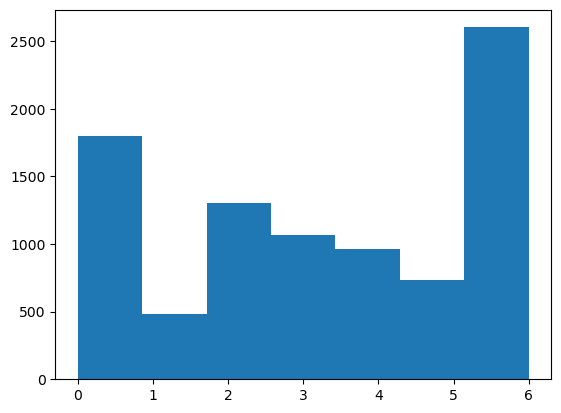

In [43]:
plt.hist(bins=model.n_clusters, x=model.labels_)
plt.show()

We have a decent spread within our clusters. There are some larger one but that is to be expected
, as this data likely has specific trends that are being followed due to it being financial data<br>
We are required to go over how this compares to our previous model from Assignment 2, where we use this same dataset. The two models do not compare at all. This current model is far better than our original, our original attempt wasn't very effective due to it overfitting and giving a false silhouette score, 0.62, which made us assume that is was a more effective model. It wasn't as it clustered all data into a single cluster with twelve points in a second cluster. Not very accurate. Another model we had with similar clustering results at 6 total clusters still had some imbalances compared to this current model. I believe this will be the most accurate we can achieve with our current knowledge and level of skill. 

## Step 4, Conclusions

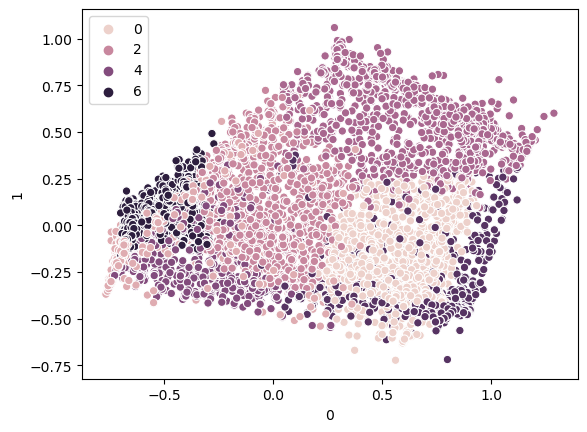

In [44]:
# Generating a scatterplot of the two 
sb.scatterplot(x=optdf[0], y=optdf[1], hue=model.labels_)
plt.show()

We cannot compare this scatterplot to anything we used in Assignment 2, we see clear patterns in 
our plot. We did not use PCA in Assignment 2 which made certain characteristics more difficult to discern when looking at a given cluster. Though now we have to look at how each cluster relates to one another using the original cleaned dataset to start gathering insights that can then be used to make informed decisions.

In [45]:
# Lets add the labels to our cleaned dataset
cleandf['Cluster Label'] = model.labels_

C:\Users\Dantun\anaconda3\envs\UsML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# now lets make a list to hold the new cluster dataframes that will be sorted via cluster label
clusters = []
for i in range(0,model.n_clusters+1):# adding 1 to ensure we gather the last cluster label
    tempdf = cleandf[cleandf['Cluster Label'] == i]
    clusters.append(tempdf)

### Cluster 1, Cash Advance Accruing Interest
This group we see do not often give maximum payments and are often likely missing payments, allowing interest to be accrued. However this group also frequenctly takes cash advances and some in this group are non-active. This group likely consists of individuals whom are struggling with day to day spending or are using their credit cards for emergencies and quick cash injections. This group also has the lowest tenure rates of all our clusters. This suggests that they have poorer credit scores, resulting in less leniency in borrowing and shorter grace periods when using credit lines. <br>
I do not think this group would be a good target for extra credit lines, loans, or other investment opportunities. Perhaps small low interest loans may be of interest to some in this group.

In [47]:
clusters[0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0
mean,1619.054466,0.935746,1292.622855,414.401669,878.502493,684.554324,0.934450,0.138504,0.892171,0.094605,2.381747,25.905954,4120.639337,1652.584140,1260.675681,0.057215,11.639399,0.0
std,2129.060328,0.188602,1501.905212,820.077505,1023.762783,1735.850239,0.097210,0.184760,0.126675,0.174799,5.776754,25.479249,3381.931151,2354.347455,3648.240727,0.107523,1.176120,0.0
min,0.000000,0.000000,12.000000,0.000000,9.650000,0.000000,0.636364,0.000000,0.500000,0.000000,0.000000,0.000000,450.000000,0.000000,0.000000,0.000000,6.000000,0.0
25%,167.757298,1.000000,389.210000,0.000000,312.480000,0.000000,0.888889,0.000000,0.818182,0.000000,0.000000,12.000000,1500.000000,438.601342,172.731484,0.000000,12.000000,0.0
50%,962.855497,1.000000,777.160000,0.000000,562.420000,0.000000,1.000000,0.000000,0.916667,0.000000,0.000000,17.000000,3000.000000,957.421268,387.054045,0.000000,12.000000,0.0
75%,2070.627593,1.000000,1675.910000,482.210000,1095.450000,495.425832,1.000000,0.250000,1.000000,0.100000,2.000000,31.000000,6000.000000,1920.457760,1082.915299,0.083333,12.000000,0.0
max,18495.558550,1.000000,15108.470000,9805.730000,14686.100000,26268.699890,1.000000,0.666667,1.000000,1.000000,71.000000,347.000000,22000.000000,40627.595240,76406.207520,0.454545,12.000000,0.0


### Cluster 2, Installment Purchasers
Immediately we see a large percentage of this group is regularily using installment purchases on their credit cards. They are also very active in the usage of their credit cards. This group is reliably keeping up with their minimum payments, there are some missed payments, and this group doesn't often fully pay off the balance. This group is likely a very good target for middle tier loans and are likely to accept new credit lines with rewards programs with similar payment requirements and may accept increased credit limits. 

In [48]:
clusters[1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0
mean,1360.440104,0.764915,299.106211,255.850186,43.256025,1825.420812,0.187505,0.113189,0.068939,0.274237,5.207039,2.664596,3174.948240,833.177545,428.302376,0.062423,7.327122,1.0
std,1680.416118,0.244900,608.603801,587.476587,141.992279,2266.018654,0.246199,0.180092,0.165225,0.260403,7.382172,5.033429,2805.641129,1738.669194,800.586256,0.184256,1.080106,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,6.000000,1.0
25%,191.778771,0.666667,0.000000,0.000000,0.000000,68.620294,0.000000,0.000000,0.000000,0.111111,1.000000,0.000000,1200.000000,147.973178,95.407691,0.000000,6.000000,1.0
50%,869.328293,0.857143,25.000000,0.000000,0.000000,1115.885225,0.111111,0.000000,0.000000,0.166667,3.000000,1.000000,2000.000000,303.411962,207.007715,0.000000,7.000000,1.0
75%,1875.522429,1.000000,319.505000,209.900000,0.000000,2562.599849,0.333333,0.166667,0.000000,0.428571,7.000000,3.000000,4000.000000,760.613315,450.423193,0.000000,8.000000,1.0
max,15258.225900,1.000000,4139.560000,4139.560000,1320.000000,14926.790590,0.857143,0.833333,0.714286,1.500000,62.000000,54.000000,19000.000000,19998.389690,10057.561920,1.000000,10.000000,1.0


### Cluster 3, Stable but Non-Regular Users
This group is likely to pay off any debts accrued via minimum payments but they do not often use their credit card, the most frequent uses are for cash advances. There are often larger sums taken using a cash advance feature but with very low usage rates for the majority of this group there are not many options for new revenue with this group. <br>Those within the extremes of this group are likely good targets for large long-term loans.

In [49]:
clusters[2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.000000,1305.0
mean,1635.424894,0.940719,883.150429,578.136958,305.813218,731.645332,0.503480,0.232554,0.291314,0.106657,2.737931,11.003831,4360.445838,1430.016103,841.196378,0.054728,11.873563,2.0
std,2013.643547,0.119674,1225.850367,940.434382,817.746964,1942.450919,0.123533,0.209135,0.197716,0.182305,6.909492,9.319112,3480.664109,2080.876990,1606.239961,0.122016,0.473320,0.0
min,0.533581,0.454545,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,9.000000,2.0
25%,306.462394,0.909091,281.970000,0.000000,42.230000,0.000000,0.416667,0.000000,0.083333,0.000000,0.000000,6.000000,1700.000000,435.600387,186.594620,0.000000,12.000000,2.0
50%,1003.774921,1.000000,573.200000,293.000000,159.000000,0.000000,0.500000,0.166667,0.333333,0.000000,0.000000,8.000000,3000.000000,853.805054,384.449529,0.000000,12.000000,2.0
75%,2022.469335,1.000000,1067.500000,810.200000,372.000000,778.725777,0.583333,0.416667,0.416667,0.166667,3.000000,13.000000,6000.000000,1664.863771,893.368255,0.083333,12.000000,2.0
max,16304.889250,1.000000,22500.000000,14215.000000,22500.000000,47137.211760,0.833333,0.750000,0.666667,1.000000,123.000000,186.000000,23000.000000,39048.597620,28483.254830,0.916667,12.000000,2.0


### Cluster 4, Full Payments and Installment Purchasers
This group we see a high rate of installment purchases, though at very low rates. This is a very active group and are more often paying over the minimum requirements, suggesting regular payment and usages (for bills or regular grocery trips). This group doesn't often deviate from their norms so aren't likely to go for large loans or credit increases. <br>However, this group is likely a great target for investment talks, into stock or managed portfolios like mutual funds. This group is also likely a good target for increased benefits and rewards with slightly higher interest rates on the existing credit lines. 

In [50]:
clusters[3].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,1895.958537,0.980437,3540.454812,2688.326585,852.128227,639.107472,0.943809,0.878423,0.501550,0.083683,2.077861,46.231707,7093.712263,3547.672584,718.805347,0.291036,11.830206,3.0
std,2474.098145,0.075938,4530.901721,3702.468475,1462.522446,2133.008748,0.091910,0.139656,0.388978,0.178462,5.755140,42.074066,4430.799370,4722.284293,1354.387514,0.373896,0.771723,0.0
min,0.000000,0.000000,8.400000,8.400000,0.000000,0.000000,0.583333,0.416667,0.000000,0.000000,0.000000,6.000000,300.000000,0.000000,0.000000,0.000000,6.000000,3.0
25%,269.158171,1.000000,1226.825000,875.602500,0.000000,0.000000,0.916667,0.750000,0.000000,0.000000,0.000000,20.000000,4000.000000,1132.354486,182.481764,0.000000,12.000000,3.0
50%,879.967912,1.000000,2340.330000,1657.245000,395.985000,0.000000,1.000000,0.916667,0.500000,0.000000,0.000000,33.000000,6500.000000,2098.462188,263.262777,0.083333,12.000000,3.0
75%,2614.939732,1.000000,4199.325000,3073.587500,1063.360000,188.033848,1.000000,1.000000,0.916667,0.083333,1.000000,57.000000,9500.000000,3984.131348,810.048442,0.583333,12.000000,3.0
max,19043.138560,1.000000,49039.570000,40761.250000,15497.190000,29282.109150,1.000000,1.000000,1.000000,1.000000,51.000000,358.000000,30000.000000,46930.598240,21235.065300,1.000000,12.000000,3.0


### Cluster 5, Low Activity Users
This group doesn't really do much with their cards. With very low One Off rates and installment rates this group isn't often using their cards, those that do aren't often fully paying it off immediately and are using the minimum payment systems in place. <br>
I cannot recommend any actions for this group as this group is generally inactive and predicatble. The extreme case in this group may even be a case of fraud that should be investigated if it hasn't been already. 

In [51]:
clusters[4].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0
mean,133.996967,0.346486,328.547305,245.401290,83.454860,491.165893,0.174541,0.071945,0.097843,0.044828,1.027055,2.954214,3995.043358,1492.058928,238.814228,0.224018,11.780437,4.0
std,290.401423,0.176096,765.217183,756.145423,196.928596,1269.317338,0.157275,0.105361,0.150751,0.083182,2.518535,3.473109,3399.594213,3621.578570,1155.101719,0.337633,0.669789,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,8.000000,4.0
25%,7.168805,0.181818,19.250000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,164.041195,57.564463,0.000000,12.000000,4.0
50%,27.254213,0.363636,117.680000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,430.213001,111.894178,0.000000,12.000000,4.0
75%,116.172752,0.454545,368.490000,220.500000,89.000000,296.676377,0.250000,0.083333,0.166667,0.083333,1.000000,4.000000,5000.000000,1282.184510,171.126550,0.333333,12.000000,4.0
max,2891.678357,0.818182,17945.000000,17945.000000,3011.360000,14371.787890,0.750000,0.583333,0.750000,0.500000,24.000000,31.000000,23000.000000,50721.483360,29272.486070,1.000000,12.000000,4.0


### Cluster 6, Active Big Spenders
This is a group that likes to use their cards for big purchases. With regular activity and frequent payments, we can assume this group is not victims of stolen credit cards and fraud. We see that there are large purchases being made regularly by these users. <br>
Targeting them with promotional loans, special loans, and higher interest and large credit limits are all good options for this group. 

In [52]:
clusters[5].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.0
mean,123.565033,0.899748,1180.347520,282.750027,898.577030,44.544642,0.864207,0.106949,0.797578,0.006842,0.148501,19.686649,4034.539881,1301.598287,191.524553,0.805726,11.298365,5.0
std,185.901184,0.149688,1442.241887,727.282520,1075.701534,438.954007,0.173137,0.200989,0.215050,0.046511,1.533978,20.941676,3321.386316,1692.175326,303.789698,0.185563,1.622513,0.0
min,1.533981,0.166667,58.320000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,3.000000,300.000000,63.770059,32.631347,0.375000,6.000000,5.0
25%,31.888057,0.818182,366.742500,0.000000,308.480000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,9.000000,1500.000000,391.607026,134.136563,0.666667,12.000000,5.0
50%,68.423739,1.000000,725.470000,0.000000,573.325000,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,12.000000,3000.000000,768.158118,161.529770,0.833333,12.000000,5.0
75%,134.661099,1.000000,1440.042500,155.250000,1105.667500,0.000000,1.000000,0.083333,1.000000,0.000000,0.000000,22.000000,5412.500000,1540.985207,176.774540,1.000000,12.000000,5.0
max,1565.982050,1.000000,14604.870000,6965.060000,12375.000000,7663.906258,1.000000,0.916667,1.000000,0.666667,36.000000,232.000000,21500.000000,15246.115940,4553.156050,1.000000,12.000000,5.0


### Cluster 7, Semi Active Spenders and Regulars
This group isn't as active as the first but are relatively active, reliably paying any debts owed, and are using their cards for a mix of larger purchases and regular bills. <br>
This group isn't making large purchases regularily but are known to use their cards for non-essential items and luxaries regularly enough that some may be interested in special interest loans, long-term payment options, and of course some promotional reward programs will be of interest to the more predictable of this group. These options can encourage more usage and potentially better returns over time. 

In [53]:
clusters[6].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster Label
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2603.0
mean,2328.355265,0.973586,154.677876,142.322320,12.402297,1731.884486,0.059033,0.046452,0.011878,0.242189,5.915098,1.106800,4314.126474,1575.980876,1098.202668,0.020911,11.870534,6.0
std,2165.186778,0.072921,652.413522,645.642911,87.590357,2553.635881,0.087255,0.077334,0.041438,0.214232,8.544054,2.363597,3364.837960,2418.105867,2616.629492,0.059360,0.421086,0.0
min,0.488050,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,10.000000,6.0
25%,925.159297,1.000000,0.000000,0.000000,0.000000,119.731456,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,1600.000000,415.437732,286.129588,0.000000,12.000000,6.0
50%,1592.102979,1.000000,0.000000,0.000000,0.000000,830.670122,0.000000,0.000000,0.000000,0.166667,3.000000,0.000000,3000.000000,787.236366,527.787946,0.000000,12.000000,6.0
75%,3017.586857,1.000000,111.670000,82.705000,0.000000,2320.766858,0.083333,0.083333,0.000000,0.333333,8.000000,1.000000,6000.000000,1680.466012,1101.788558,0.000000,12.000000,6.0
max,14581.459140,1.000000,22101.780000,22101.780000,3000.000000,26194.049540,0.416667,0.416667,0.250000,1.100000,123.000000,40.000000,19000.000000,39461.965800,61031.618600,0.833333,12.000000,6.0
